# 1. data_preprocess.py 전처리 결과

## DNN_AC Network

In [61]:
import numpy as np
import pandas as pd
import data_preprocess

In [68]:
print('LSTMDNN Chart Input : ', training_data.shape)
training_data[-1][-1]

LSTMDNN Chart Input :  (153, 10, 24)


array([-0.02786645,  0.3429057 , -0.04376107,  0.20777744, -0.06256108,
        0.09740482, -0.09266899,  0.00368612, -0.01230769, -0.02153846,
        0.64464005,  0.01572327,  0.00952381,  0.03773585,  0.12893082,
        0.12893082,  0.00952381,  0.00952381,  0.00952381, -0.06401766,
       -0.12517194,  0.07684232,  0.00231939,  0.01907815])

In [ ]:
chart_data, training_data = data_preprocess.load_data(code='005380', model='DNN', start_date='20150101', end_date='20201201', n_steps=10) 

In [ ]:
print('DNN Chart Input : ', training_data.shape)

DNN Chart Input :  (1379, 24)


In [ ]:
df = pd.DataFrame(training_data, columns=data_preprocess.COLUMNS_TRADING_DATA)
df

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
close_ema15_ratio,1379.0,0.000173,0.040582,-0.300832,-0.021119,-0.000595,0.019934,0.285188
volume_ema15_ratio,1379.0,-0.007356,0.403449,-0.624841,-0.267672,-0.096638,0.154324,2.465717
close_ema33_ratio,1379.0,0.000388,0.061454,-0.383314,-0.031492,-0.002380,0.031267,0.431338
volume_ema33_ratio,1379.0,0.005562,0.471589,-0.648573,-0.294709,-0.099953,0.167014,3.718827
close_ema56_ratio,1379.0,0.000307,0.078981,-0.416121,-0.038714,-0.004742,0.038876,0.529243
volume_ema56_ratio,1379.0,0.018463,0.512033,-0.678217,-0.307126,-0.097620,0.185468,4.734733
close_ema112_ratio,1379.0,-0.002003,0.104417,-0.443703,-0.051117,-0.010915,0.043097,0.603784
volume_ema112_ratio,1379.0,0.045064,0.569852,-0.710632,-0.306514,-0.098740,0.212197,6.026921
open_lastclose_ratio,1379.0,-0.000200,0.010474,-0.089474,-0.005353,0.000000,0.004237,0.066845
close_lastclose_ratio,1379.0,0.000267,0.020677,-0.103560,-0.011152,0.000000,0.010792,0.156463


## LSTMDNN_AC Network

In [27]:
chart_data, training_data = data_preprocess.load_data(code='005380', model='LSTMDNN', start_date='20150101', end_date='20201201', n_steps=10) 

In [28]:
print('LSTMDNN Chart Input : ', training_data.shape)

LSTMDNN Chart Input :  (1369, 10, 24)


****

# 2. LSTMDNN Network 모델 구조 확인
    
* 특징
    * action에 의해 독립적인 부분과 종속적인 부분을 분리
    * Actor Network와 Critic Network는 Shared Network를 가지고 있음.
    
    * **[Shared Network]**
    
        * **[LSTM Part]** 차트 데이터는 나의 action에 독립적.
            * 다만, 내 position이 크다면 나의 action에 영향을 받을 수 있음.
            * 시계열 연속성이 존재하므로 RNN 구조인 LSTM Network 사용하고.
            * n_steps를 5로 설정(주중 거래일 수).

        * **[DNN Part]** Balance 데이터는 나의 action에 종속적.
            * Feed Forward Network 사용
        
        * **[Concatenate]**    
            * 두 네크워크로 부터 학습된 고차원 feature를 결합(concatenate)후 Feed Forward Network 학습.
    
    * **[Critic Network, Actor Network]** 
        * shared network 이후 actor와 critic 신경망을 각각의 학습을 통해서 정책과 q-value를 반환함.


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Input, Concatenate, BatchNormalization, Dropout

# ActorCritic 인공신경망
class LSTM_DNN_AC(tf.keras.Model) :
    def __init__(self, action_size, n_steps, state_size, balance_size) :
        super(LSTM_DNN_AC, self).__init__()
        self.action_size = action_size
        self.n_steps = n_steps
        self.state_size = state_size
        self.balance_size = balance_size

        # chart_state : (n_steps, chart_columns) ex) (5, 28)
        self.lstm1 = LSTM(128, activation='tanh', dropout= 0.4, return_sequences=True)
        self.lstm2 = LSTM(64, activation = 'tanh',dropout= 0.4, return_sequences=True)
        self.lstm3 = LSTM(64, activation = 'tanh',dropout= 0.4, return_sequences=False)
        self.batch_lstm3 = BatchNormalization()

        # balance_state : (balance_info) ex) (4)
        self.dnn1 = Dense(128, activation='relu')
        self.drop_dnn1 = Dropout(0.4)
        self.batch_dnn1 = BatchNormalization()

        self.dnn2 = Dense(64, activation='relu')
        self.drop_dnn2 = Dropout(0.4)
        self.batch_dnn2 = BatchNormalization()

        # concatenate & shared network
        self.concatenate = Concatenate()
        self.shared_fc = Dense(64, activation='relu')
        self.drop_shared = Dropout(0.4)
        self.batch_shared = BatchNormalization()

        # Actor part & Critic part
        self.policy1 = Dense(32, activation = 'relu')
        self.policy = Dense(action_size, activation='linear')

        self.value1 = Dense(32, activation = 'relu')
        self.value = Dense(1, activation='linear')
    
    def call(self, inputs) :
        # LSTM PART & BatchNormalization(only Last part)
        c_inp = inputs[0]
        c = self.lstm1(c_inp)
        c = self.lstm2(c)
        c = self.lstm3(c)
        c = self.batch_lstm3(c)

        # DNN PART $ BatchNormalization
        b_inp = inputs[1]
        b = self.dnn1(b_inp)
        b = self.drop_dnn1(b)
        b = self.batch_dnn1(b)

        b = self.dnn2(b)
        b = self.drop_dnn2(b)
        b = self.batch_dnn2(b)

        # CONCATENATE & SHARED PART -> (...chart, ...balance) (16+16, ) & BatchNormalization
        shared = self.concatenate([c, b])
        shared = self.shared_fc(shared)
        shared = self.drop_shared(shared)
        shared = self.batch_shared(shared)
        # ACTOR PART
        policy = self.policy1(shared)
        policy = self.policy(policy)

        # CRITIC PART
        value = self.value1(shared)
        value = self.value(value)
        return policy, value

    # Subclassing API에서 plot_model을 그리기 위해서 build_graph 메서드 생성
    def build_graph(self) :
        c_inp = Input(shape= (self.n_steps, self.state_size), dtype=tf.float32)
        b_inp = Input(shape= (self.balance_size, ), dtype=tf.float32)
        return Model(inputs=[c_inp, b_inp], outputs=self.call([c_inp, b_inp]))

In [5]:
n_steps, state_size, balance_size = 5, 24, 4
actor_critic = LSTM_DNN_AC(action_size=3, n_steps=n_steps, state_size=state_size, balance_size=balance_size)

chart_inp = tf.TensorShape((None, n_steps, state_size))
balance_inp = tf.TensorShape((None, balance_size))
actor_critic.build([chart_inp, balance_inp])

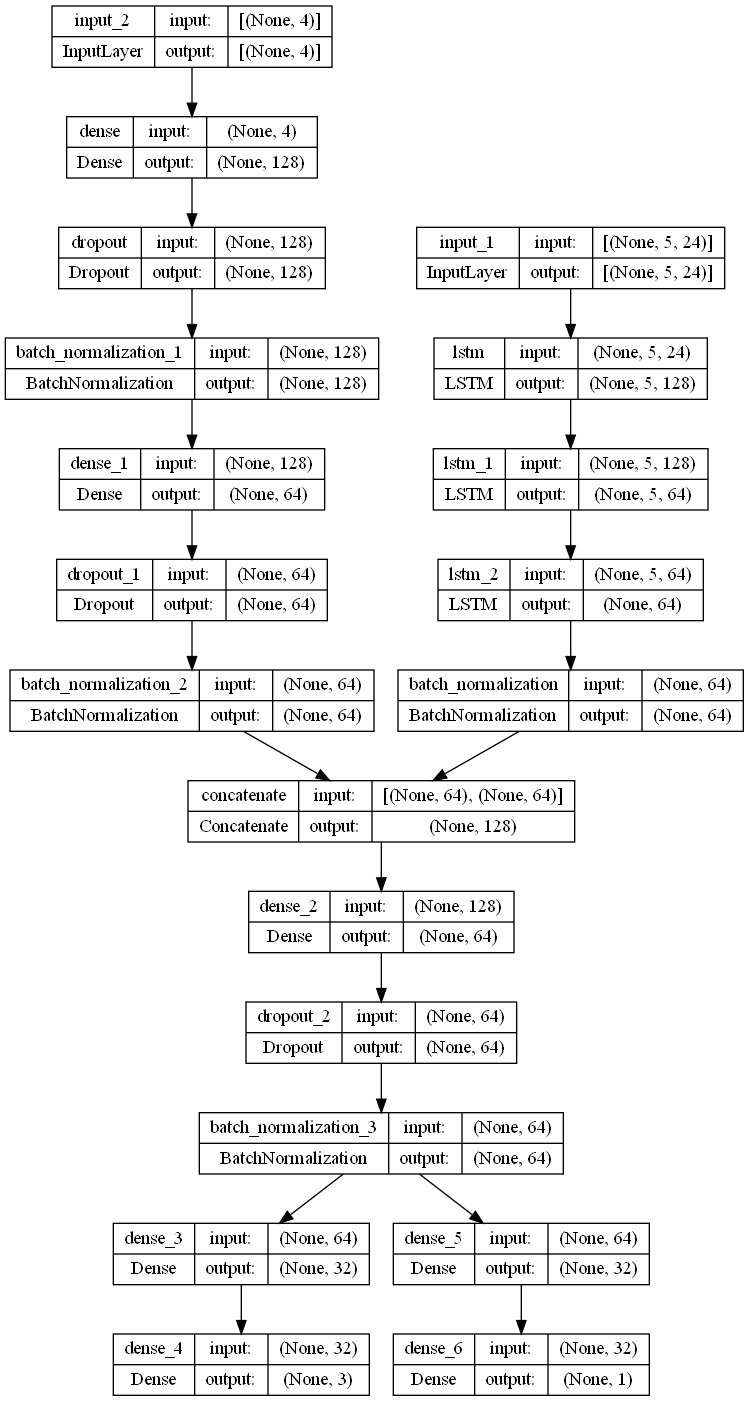

In [6]:
# Plot Model
tf.keras.utils.plot_model(
        actor_critic.build_graph(),
        to_file='./model/structure/LSTMDNN_AC.png', dpi=96,
        show_shapes=True, show_layer_names=True, expand_nested=False)

# 3. DNN_AC 구조 확인

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization, Dropout

class DNN_AC(tf.keras.Model) :
    def __init__(self, action_size, state_size, balance_size) :
        super(DNN_AC, self).__init__()
        self.action_size = action_size
        self.state_size = state_size
        self.balance_size = balance_size
        # gather input
        self.concatenate = Concatenate()
    
        # Share Network : first layer
        self.dnn1 = Dense(128, activation='relu')
        self.drop_dnn1 = Dropout(0.4)
        self.batch_dnn1 = BatchNormalization()

        # Share Network : Second layer
        self.dnn2 = Dense(64, activation='relu')
        self.drop_dnn2 = Dropout(0.4)
        self.batch_dnn2 = BatchNormalization()

        # Actor part & Critic part
        self.policy1 = Dense(32, activation = 'relu')
        self.policy = Dense(action_size, activation='linear')

        self.value1 = Dense(32, activation = 'relu')
        self.value = Dense(1, activation='linear')
    
    def call(self, inputs) :
        inp = self.concatenate([inputs[0], inputs[1]])
        # SHARE PART
        shared = self.dnn1(inp)
        shared = self.drop_dnn1(shared)
        shared = self.batch_dnn1(shared)
        shared = self.dnn2(shared)
        shared = self.drop_dnn2(shared)
        shared = self.batch_dnn2(shared)

        # ACTOR PART
        policy = self.policy1(shared)
        policy = self.policy(policy)

        # CRITIC PART
        value = self.value1(shared)
        value = self.value(value)
        return policy, value

    # Subclassing API에서 plot_model을 그리기 위해서 build_graph 메서드 생성
    def build_graph(self) :
        c_inp = Input(shape= (self.state_size, ), dtype=tf.float32)
        b_inp = Input(shape= (self.balance_size, ), dtype=tf.float32)
        return Model(inputs=[c_inp, b_inp], outputs=self.call([c_inp, b_inp]))

In [8]:
state_size, balance_size = 24, 4
actor_critic = DNN_AC(action_size=3, state_size=state_size, balance_size=balance_size)

chart_inp = tf.TensorShape((None, state_size))
balance_inp = tf.TensorShape((None, balance_size))
actor_critic.build([chart_inp, balance_inp])

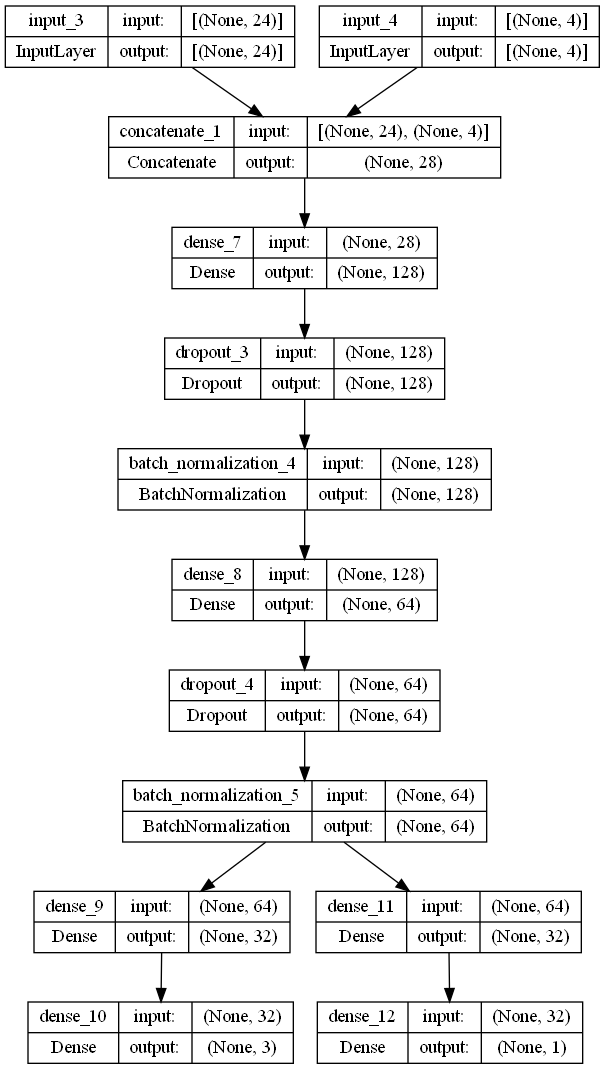

In [9]:
# Plot Model
tf.keras.utils.plot_model(
        actor_critic.build_graph(),
        to_file='./model/structure/DNN_AC.png', dpi=96,
        show_shapes=True, show_layer_names=True, expand_nested=False)

# 모델 훈련 내용 시각화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
import os

# get loss file path
loss_path = os.path.join(os.getcwd(), 'log', 'loss')
loss_file = os.listdir(loss_path)
path_dnn_loss = os.path.join(loss_path, loss_file[0])
path_lstmdnn_loss = os.path.join(loss_path, loss_file[1])

print('[DNN Model loss path] : ', path_dnn_loss)
print('[LSTMDNN Model loss path] : ', path_lstmdnn_loss)

# get csv file
colnames=['total_loss', 'critic_loss', 'actor_loss', 'entropy'] 
df_dnn_loss = pd.read_csv(path_dnn_loss, names=colnames, header=None)
df_lstmdnn_loss = pd.read_csv(path_lstmdnn_loss, names=colnames, header=None)

[DNN Model loss path] :  c:\Users\user\Desktop\github\rl_trading\log\loss\DNN_10.csv
[LSTMDNN Model loss path] :  c:\Users\user\Desktop\github\rl_trading\log\loss\LSTMDNN_10.csv


Text(0.5, 1.0, '[LSTMDNN] : Policy entropy')

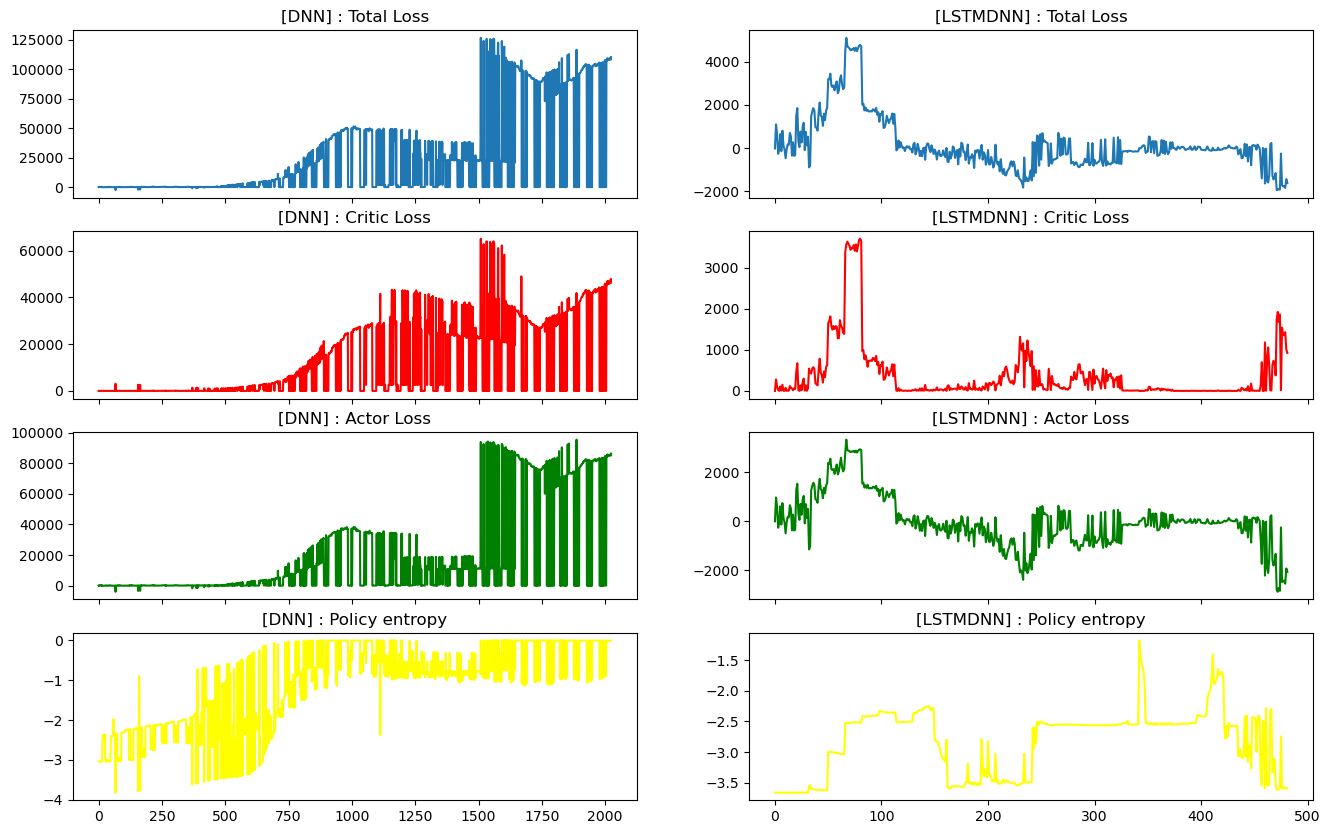

In [28]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16,10), sharex='col')

# dnn loss plot
axes[0][0].plot(df_dnn_loss.index, df_dnn_loss.total_loss)
axes[1][0].plot(df_dnn_loss.index, df_dnn_loss.critic_loss, color = 'red')
axes[2][0].plot(df_dnn_loss.index, df_dnn_loss.actor_loss, color = 'green')
axes[3][0].plot(df_dnn_loss.index, df_dnn_loss.entropy, color='yellow')

# title
axes[0][0].set_title('[DNN] : Total Loss')
axes[1][0].set_title('[DNN] : Critic Loss')
axes[2][0].set_title('[DNN] : Actor Loss')
axes[3][0].set_title('[DNN] : Policy entropy')


# dnn loss plot
axes[0][1].plot(df_lstmdnn_loss.index, df_lstmdnn_loss.total_loss)
axes[1][1].plot(df_lstmdnn_loss.index, df_lstmdnn_loss.critic_loss, color = 'red')
axes[2][1].plot(df_lstmdnn_loss.index, df_lstmdnn_loss.actor_loss, color = 'green')
axes[3][1].plot(df_lstmdnn_loss.index, df_lstmdnn_loss.entropy, color='yellow')

# title
axes[0][1].set_title('[LSTMDNN] : Total Loss')
axes[1][1].set_title('[LSTMDNN] : Critic Loss')
axes[2][1].set_title('[LSTMDNN] : Actor Loss')
axes[3][1].set_title('[LSTMDNN] : Policy entropy')



# 테스트 결과 시각화


In [55]:
# ./log/{start_date}/ file.log 의 profitloss
start_date = ['20180601', '20190101', '20200101', '20210101']
lstmdnn_return = np.array([0.412, 0.363, -0.654, 0.016])*100
dnn_return = np.array([0.054, -0.863, 0.098, -0.391])*100
monkey_return = np.array([0.201, -0.038, -0.078, -0.071])*100

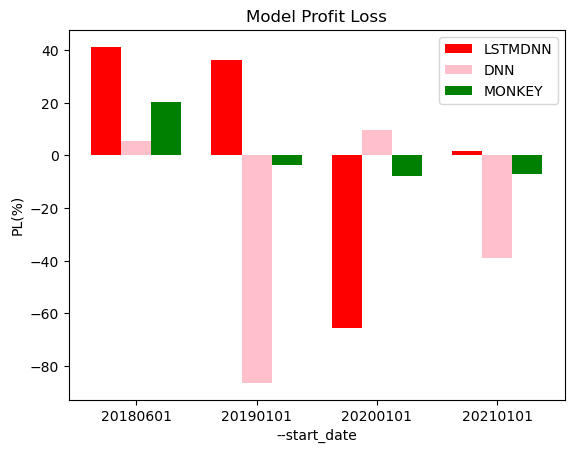

In [60]:
X_axis = np.arange(len(start_date))

plt.bar(X_axis-0.25, lstmdnn_return, 0.25, label = 'LSTMDNN', color='red')
plt.bar(X_axis, dnn_return, 0.25, label = 'DNN', color='pink')
plt.bar(X_axis+0.25, monkey_return, 0.25, label = 'MONKEY', color='green')

plt.xticks(X_axis, start_date)
plt.xlabel('--start_date')
plt.ylabel('PL(%)')
plt.title('Model Profit Loss')
plt.legend()
plt.show()
